Logistic Regression

                       precision    recall  f1-score   support

without heart disease       0.85      0.83      0.84       126
   with heart disease       0.86      0.87      0.87       150

             accuracy                           0.86       276
            macro avg       0.85      0.85      0.85       276
         weighted avg       0.85      0.86      0.85       276



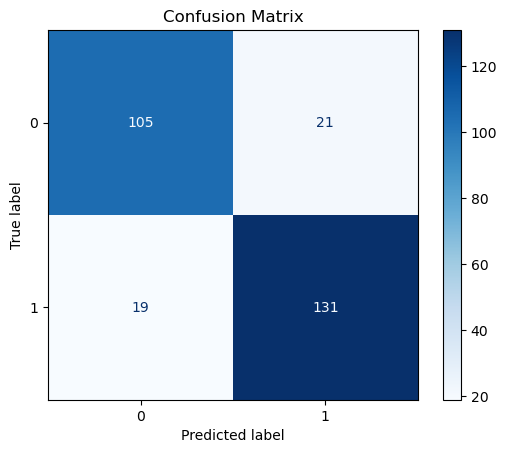

Training time for Logistic Regression: 0.03 seconds

Feature Importance (Coefficient):
     Feature  Coefficient
10        ca     2.667677
7      exang     0.914973
8    oldpeak     0.827224
1        sex     0.767650
4   trestbps     0.655070
11      thal     0.499735
6     thalch     0.265037
5        fbs     0.045880
0        age    -0.027477
2    dataset    -0.067722
3         cp    -0.503014
9      slope    -1.013430


In [8]:
#Load data
import pandas as pd
df = pd.read_excel(r'C:\Users\Admin\Desktop\prepocessing_and_minmax_scaling.xlsx')

df["num"] = df["num"].replace([2, 3, 4], 1)
# Split the data into features (X) and target (y)
X = df.drop(['num','chol','restecg'],axis= 1)
y = df['num']

# Split the data into training and test sets
from sklearn.model_selection import RandomizedSearchCV, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16,max_iter=700)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

#Check accuracy score and Confusion matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
target_names = ['without heart disease', 'with heart disease']
print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)  
plt.title("Confusion Matrix")
plt.show()



import time
start_time = time.time()
logreg.fit(X_train, y_train)
end_time = time.time()
print(f"Training time for Logistic Regression: {end_time - start_time:.2f} seconds")

#Evaluate feature_score by Coefficients 
coefficients = logreg.coef_[0]

# Display feature importance using coefficients 
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
})
print("\nFeature Importance (Coefficient):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))
